# Phase 4: Exploratory Data Analysis - Power Generation Patterns

**Objective**: Analyze New York State's electricity generation patterns from renewable and non-renewable sources to understand production trends and weather dependencies.

## Analysis Goals:
1. Examine generation trends by energy source (2021-2023)
2. Calculate renewable energy contribution percentages
3. Identify seasonal patterns in renewable generation
4. Analyze correlation between weather variables and generation
5. Compare variability across different energy sources
6. Generate visualizations (Figure 8-12 from paper)

## Input Data:
- `data/processed/merged_data.csv`
- Focus on: Total_Generation, Hydroelectric, Wind, Solar

## Expected Outputs:
- Time series plots by energy source
- Renewable energy share analysis
- Weather-generation correlation plots
- Statistical insights on generation patterns

## Note:
Generation data represents **New York State** (not NYC specifically), which is a limitation acknowledged in the methodology.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)

In [8]:
print("="*60)
print("LOADING GENERATION DATA")
print("="*60)

# Load merged dataset
df = pd.read_csv('../data/processed/merged_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df_gen = df.groupby('Date').agg({
    'Total_Generation': 'mean',
    'Hydroelectric': 'mean',
    'Wind': 'mean',
    'Solar': 'mean',
    'Avg_Temp': 'mean',
    'Total_Precip': 'mean',
    'Avg_Wind': 'mean'
}).reset_index()

LOADING GENERATION DATA


In [9]:
print(f"\nGeneration data shape: {df_gen.shape}")
print("\nFirst 10 rows:")
print(df_gen.head(10))

print("\nGeneration statistics (Billion KWh):")
gen_stats = df_gen[['Total_Generation', 'Hydroelectric', 'Wind', 'Solar']].describe() / 1e9
print(gen_stats)

print("\nMissing values:")
print(df_gen.isnull().sum())


Generation data shape: (36, 8)

First 10 rows:
        Date  Total_Generation  Hydroelectric         Wind        Solar  \
0 2021-01-01      1.077300e+10   2.571000e+09  262000000.0   62000000.0   
1 2021-02-01      9.375000e+09   2.074000e+09  318000000.0   46000000.0   
2 2021-03-01      9.909000e+09   2.422000e+09  574000000.0  109000000.0   
3 2021-04-01      8.733000e+09   2.304000e+09  328000000.0  113000000.0   
4 2021-05-01      9.333000e+09   2.363000e+09  277000000.0  126000000.0   
5 2021-06-01      1.109700e+10   2.337000e+09  379000000.0  126000000.0   
6 2021-07-01      1.167900e+10   2.429000e+09  204000000.0  114000000.0   
7 2021-08-01      1.237300e+10   2.439000e+09  212000000.0  109000000.0   
8 2021-09-01      9.893000e+09   2.267000e+09  332000000.0  109000000.0   
9 2021-10-01      9.574000e+09   2.368000e+09  344000000.0   87000000.0   

    Avg_Temp  Total_Precip  Avg_Wind  
0  34.758065          2.31  6.797419  
1  34.160714          5.13  6.487143  
2  45.822

## 1. Power Generation Trends by Energy Source

**Objective**: Visualize electricity generation trends over time for different energy sources to identify patterns and growth.

**Analysis Focus**:
- Track total generation and renewable sources (hydroelectric, wind, solar)
- Identify seasonal patterns for each energy source
- Observe growth trends in renewable energy
- Compare scale and variability across sources

**Expected Insights**:
- Which renewable source is most stable?
- Are wind and solar growing over time?
- How does hydroelectric vary seasonally?

FIGURE 8: GENERATION TRENDS BY ENERGY SOURCE


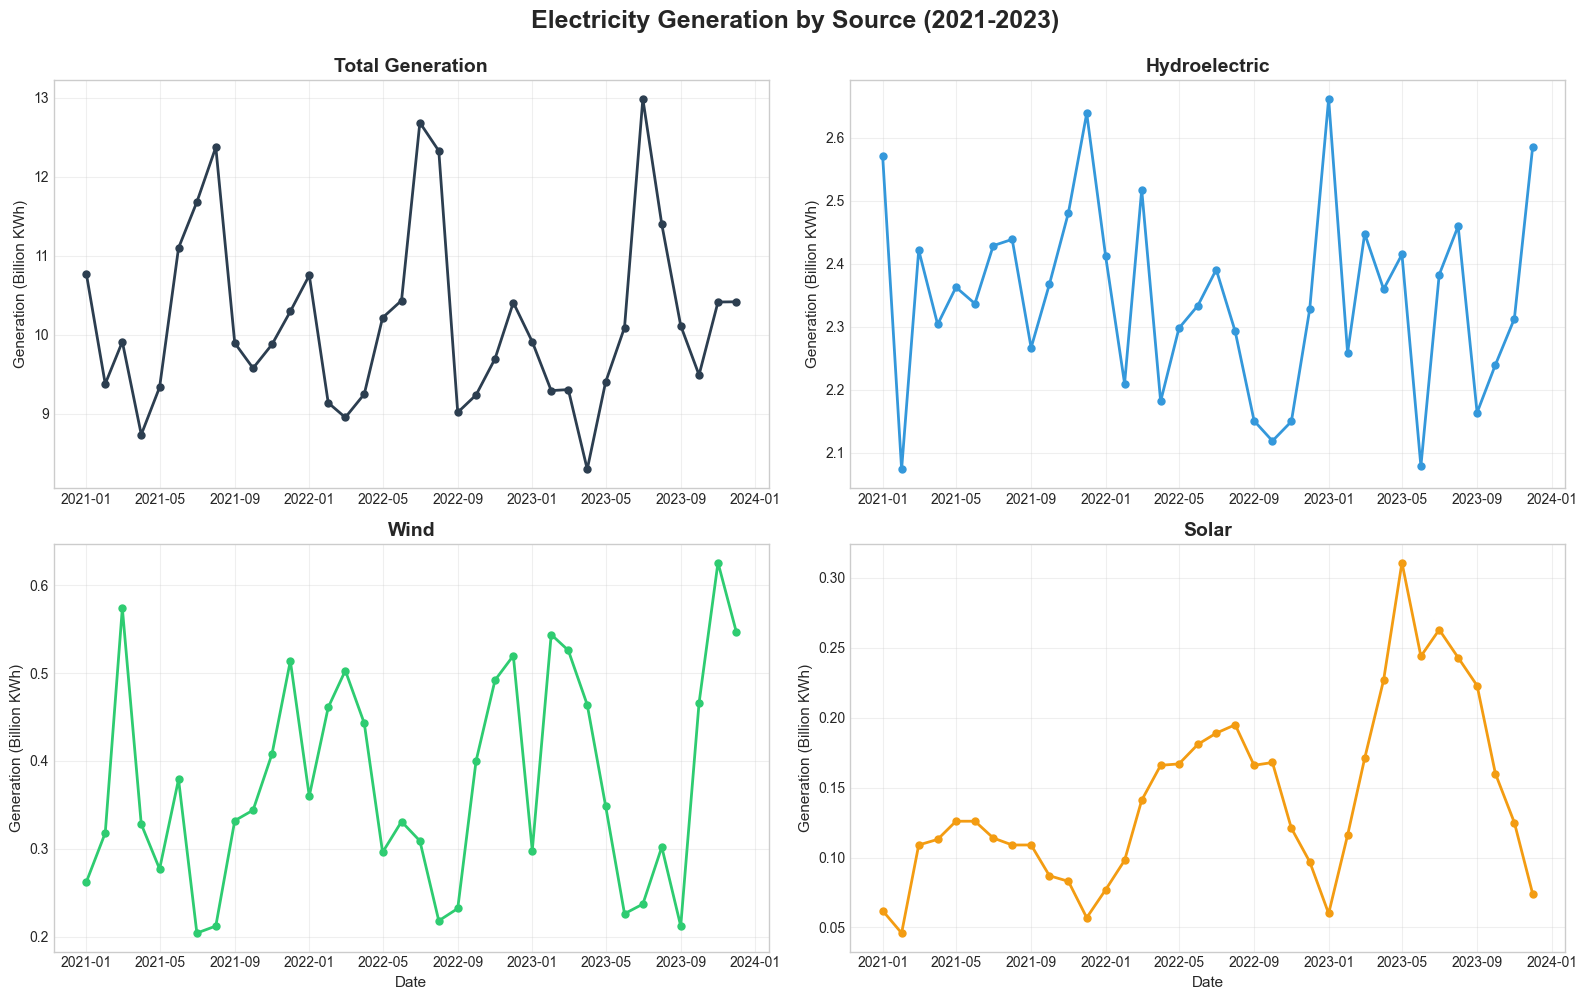

In [10]:
print("="*60)
print("FIGURE 8: GENERATION TRENDS BY ENERGY SOURCE")
print("="*60)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Electricity Generation by Source (2021-2023)', fontsize=18, fontweight='bold', y=0.995)

# 1. Total Generation
axes[0, 0].plot(df_gen['Date'], df_gen['Total_Generation'] / 1e9, 
                marker='o', linewidth=2, color='#2c3e50', markersize=5)
axes[0, 0].set_title('Total Generation', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Generation (Billion KWh)', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# 2. Hydroelectric
axes[0, 1].plot(df_gen['Date'], df_gen['Hydroelectric'] / 1e9, 
                marker='o', linewidth=2, color='#3498db', markersize=5)
axes[0, 1].set_title('Hydroelectric', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Generation (Billion KWh)', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# 3. Wind
axes[1, 0].plot(df_gen['Date'], df_gen['Wind'] / 1e9, 
                marker='o', linewidth=2, color='#2ecc71', markersize=5)
axes[1, 0].set_title('Wind', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Generation (Billion KWh)', fontsize=11)
axes[1, 0].set_xlabel('Date', fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# 4. Solar
axes[1, 1].plot(df_gen['Date'], df_gen['Solar'] / 1e9, 
                marker='o', linewidth=2, color='#f39c12', markersize=5)
axes[1, 1].set_title('Solar', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Generation (Billion KWh)', fontsize=11)
axes[1, 1].set_xlabel('Date', fontsize=11)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()

In [11]:
# Save figure
plt.savefig('../results/figures/fig8_generation_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved")

print("\nAverage monthly generation (Billion KWh):")
print(f"Total: {df_gen['Total_Generation'].mean() / 1e9:.2f}")
print(f"Hydroelectric: {df_gen['Hydroelectric'].mean() / 1e9:.2f}")
print(f"Wind: {df_gen['Wind'].mean() / 1e9:.2f}")
print(f"Solar: {df_gen['Solar'].mean() / 1e9:.2f}")

<Figure size 1200x600 with 0 Axes>


Figure saved

Average monthly generation (Billion KWh):
Total: 10.17
Hydroelectric: 2.35
Wind: 0.38
Solar: 0.14


## 2. Renewable Energy Contribution Analysis

**Objective**: Calculate and visualize the percentage contribution of each renewable energy source to total generation.

**Analysis Focus**:
- Calculate renewable energy share of total generation
- Compare contribution of each renewable source (hydroelectric, wind, solar)
- Visualize energy mix with pie chart
- Track renewable percentage over time

**Expected Insights**:
- What percentage of NY State's electricity comes from renewables?
- Which renewable source contributes the most?
- Is the renewable share growing over time?

In [12]:
print("="*60)
print("FIGURE 9: RENEWABLE ENERGY SHARE")
print("="*60)

# Calculate total renewable generation
df_gen['Total_Renewable'] = df_gen['Hydroelectric'] + df_gen['Wind'] + df_gen['Solar']
df_gen['Renewable_Percentage'] = (df_gen['Total_Renewable'] / df_gen['Total_Generation']) * 100

# Calculate average contribution of each source
avg_total = df_gen['Total_Generation'].mean()
avg_hydro = df_gen['Hydroelectric'].mean()
avg_wind = df_gen['Wind'].mean()
avg_solar = df_gen['Solar'].mean()
avg_renewable = df_gen['Total_Renewable'].mean()
avg_other = avg_total - avg_renewable

print(f"\nAverage Renewable Share: {df_gen['Renewable_Percentage'].mean():.2f}%")
print(f"\nEnergy Mix (Average):")
print(f"Hydroelectric: {(avg_hydro/avg_total)*100:.2f}%")
print(f"Wind: {(avg_wind/avg_total)*100:.2f}%")
print(f"Solar: {(avg_solar/avg_total)*100:.2f}%")
print(f"Other (Non-renewable): {(avg_other/avg_total)*100:.2f}%")

FIGURE 9: RENEWABLE ENERGY SHARE

Average Renewable Share: 28.48%

Energy Mix (Average):
Hydroelectric: 23.07%
Wind: 3.69%
Solar: 1.40%
Other (Non-renewable): 71.84%


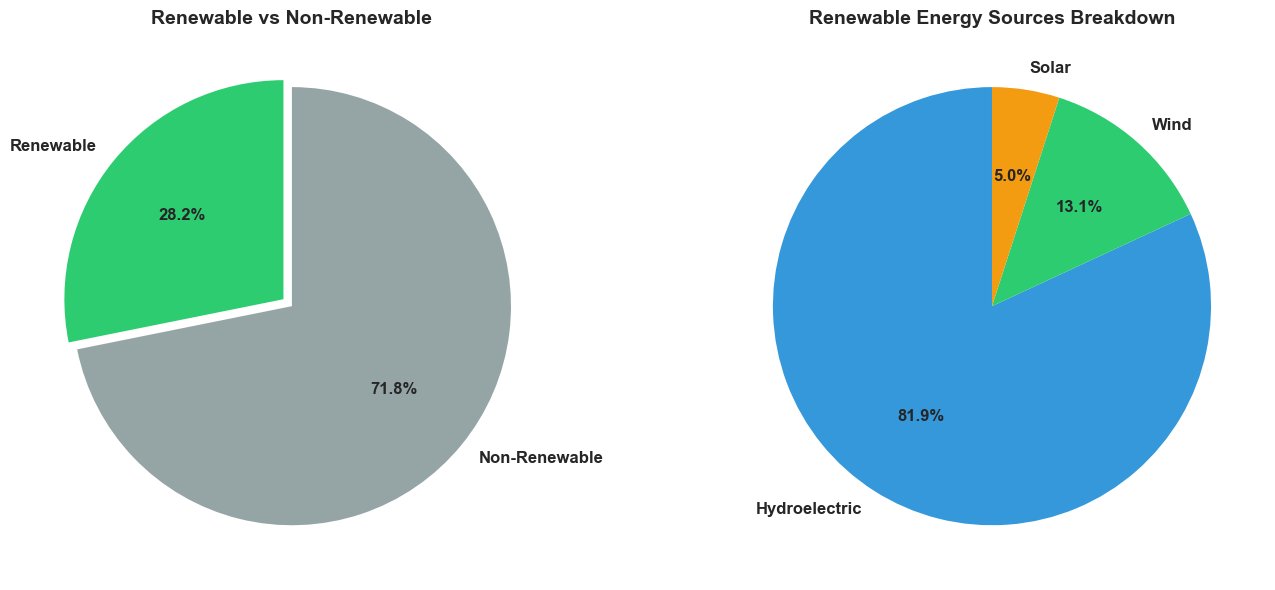

In [13]:
# Create pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart 1: Renewable vs Non-renewable
sizes1 = [avg_renewable, avg_other]
labels1 = ['Renewable', 'Non-Renewable']
colors1 = ['#2ecc71', '#95a5a6']
explode1 = (0.05, 0)

axes[0].pie(sizes1, explode=explode1, labels=labels1, colors=colors1,
            autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Renewable vs Non-Renewable', fontsize=14, fontweight='bold')

# Pie chart 2: Renewable sources breakdown
sizes2 = [avg_hydro, avg_wind, avg_solar]
labels2 = ['Hydroelectric', 'Wind', 'Solar']
colors2 = ['#3498db', '#2ecc71', '#f39c12']

axes[1].pie(sizes2, labels=labels2, colors=colors2,
            autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Renewable Energy Sources Breakdown', fontsize=14, fontweight='bold')

plt.tight_layout()

In [14]:
# Save figure
plt.savefig('../results/figures/fig9_renewable_share.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved")

<Figure size 1200x600 with 0 Axes>


Figure saved


## 3. Monthly Generation Patterns

**Objective**: Visualize generation patterns across months for each energy source using heatmaps to identify seasonal trends.

**Analysis Focus**:
- Create heatmap showing generation by month for each source
- Identify peak generation months for each renewable source
- Compare seasonal variability across energy types

**Expected Insights**:
- Hydroelectric peaks in spring (snowmelt)
- Wind generation highest in winter/spring
- Solar generation peaks in summer months

FIGURE 10: MONTHLY GENERATION PATTERNS


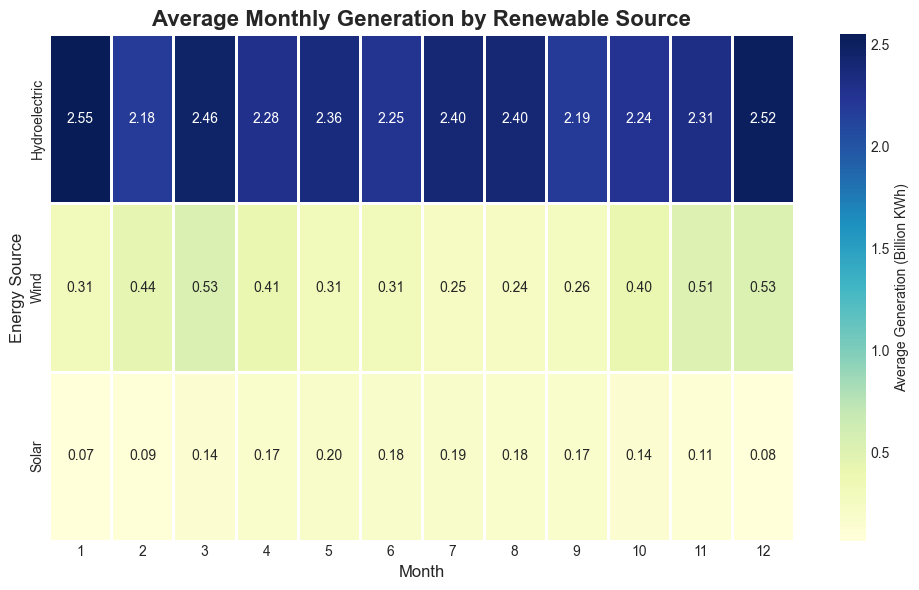

In [15]:
print("="*60)
print("FIGURE 10: MONTHLY GENERATION PATTERNS")
print("="*60)

# Add month column
df_gen['Month'] = df_gen['Date'].dt.month

# Calculate average generation by month for each source
monthly_gen = df_gen.groupby('Month')[['Hydroelectric', 'Wind', 'Solar']].mean() / 1e9

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_gen.T, 
            annot=True, 
            fmt='.2f', 
            cmap='YlGnBu',
            cbar_kws={'label': 'Average Generation (Billion KWh)'},
            linewidths=1,
            linecolor='white')

plt.title('Average Monthly Generation by Renewable Source', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy Source', fontsize=12)
plt.tight_layout()

In [16]:
# Save figure
plt.savefig('../results/figures/fig10_monthly_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved")

# Identify peak months
print("\nPeak generation months:")
print(f"Hydroelectric: Month {monthly_gen['Hydroelectric'].idxmax()}")
print(f"Wind: Month {monthly_gen['Wind'].idxmax()}")
print(f"Solar: Month {monthly_gen['Solar'].idxmax()}")

<Figure size 1200x600 with 0 Axes>


Figure saved

Peak generation months:
Hydroelectric: Month 1
Wind: Month 3
Solar: Month 5


## 4. Weather Variables vs Generation Correlation

**Objective**: Analyze the relationship between weather variables and renewable energy generation to understand environmental dependencies.

**Analysis Focus**:
- Precipitation vs Hydroelectric generation
- Wind speed vs Wind generation
- Temperature vs Solar generation (proxy for sunshine)
- Calculate correlation coefficients

**Expected Insights**:
- Precipitation should positively correlate with hydroelectric
- Wind speed should positively correlate with wind generation
- Temperature may correlate with solar (more sun in warmer months)

FIGURE 11: WEATHER-GENERATION CORRELATIONS


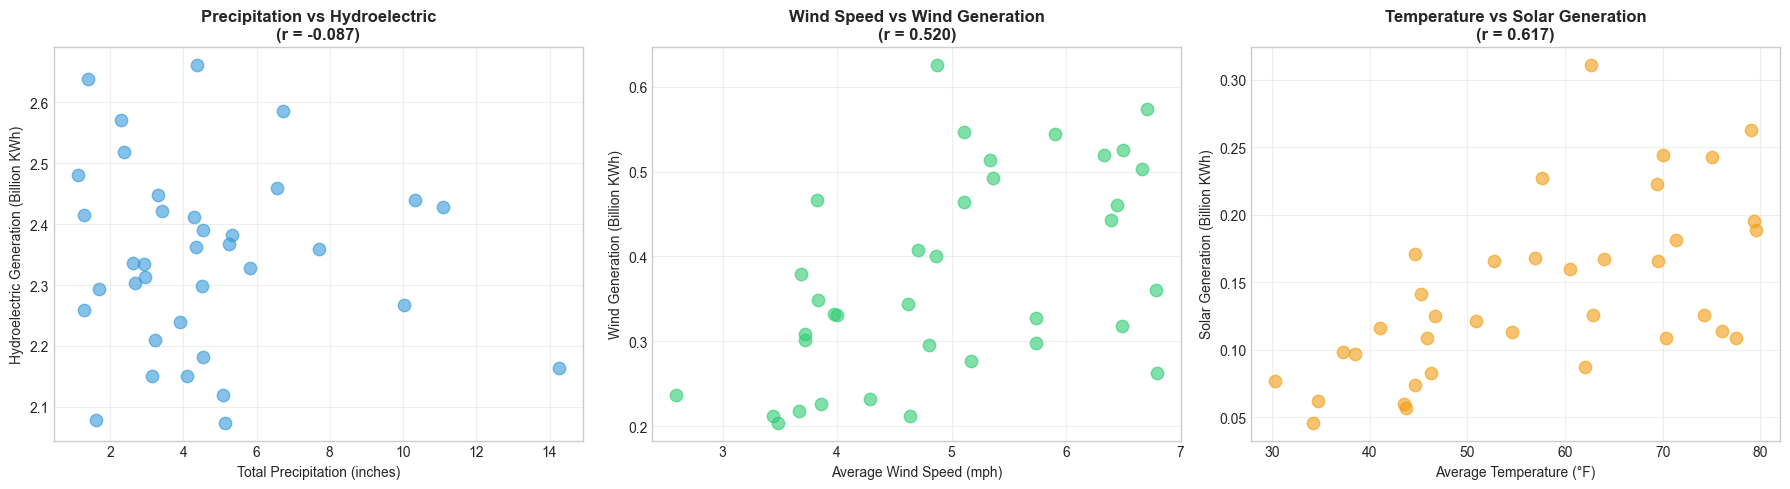


Figure saved

Correlation Results:
Precipitation-Hydroelectric: -0.087 (p=0.6142)
Wind Speed-Wind: 0.520 (p=0.0012)
Temperature-Solar: 0.617 (p=0.0001)


In [17]:
print("="*60)
print("FIGURE 11: WEATHER-GENERATION CORRELATIONS")
print("="*60)

# Create correlation scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Precipitation vs Hydroelectric
axes[0].scatter(df_gen['Total_Precip'], df_gen['Hydroelectric'] / 1e9, 
                alpha=0.6, s=80, color='#3498db')
corr1, p1 = pearsonr(df_gen['Total_Precip'], df_gen['Hydroelectric'])
axes[0].set_title(f'Precipitation vs Hydroelectric\n(r = {corr1:.3f})', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Total Precipitation (inches)', fontsize=10)
axes[0].set_ylabel('Hydroelectric Generation (Billion KWh)', fontsize=10)
axes[0].grid(True, alpha=0.3)

# 2. Wind Speed vs Wind Generation
axes[1].scatter(df_gen['Avg_Wind'], df_gen['Wind'] / 1e9, 
                alpha=0.6, s=80, color='#2ecc71')
corr2, p2 = pearsonr(df_gen['Avg_Wind'], df_gen['Wind'])
axes[1].set_title(f'Wind Speed vs Wind Generation\n(r = {corr2:.3f})', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Average Wind Speed (mph)', fontsize=10)
axes[1].set_ylabel('Wind Generation (Billion KWh)', fontsize=10)
axes[1].grid(True, alpha=0.3)

# 3. Temperature vs Solar Generation
axes[2].scatter(df_gen['Avg_Temp'], df_gen['Solar'] / 1e9, 
                alpha=0.6, s=80, color='#f39c12')
corr3, p3 = pearsonr(df_gen['Avg_Temp'], df_gen['Solar'])
axes[2].set_title(f'Temperature vs Solar Generation\n(r = {corr3:.3f})', 
                  fontsize=12, fontweight='bold')
axes[2].set_xlabel('Average Temperature (°F)', fontsize=10)
axes[2].set_ylabel('Solar Generation (Billion KWh)', fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()

# Save figure
plt.savefig('../results/figures/fig11_weather_generation_corr.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved")

print("\nCorrelation Results:")
print(f"Precipitation-Hydroelectric: {corr1:.3f} (p={p1:.4f})")
print(f"Wind Speed-Wind: {corr2:.3f} (p={p2:.4f})")
print(f"Temperature-Solar: {corr3:.3f} (p={p3:.4f})")

## 5. Generation Variability by Energy Source

**Objective**: Compare the variability and distribution of generation across different energy sources using box plots.

**Analysis Focus**:
- Visualize distribution and variability for each energy source
- Identify outliers and extreme values
- Compare stability across sources
- Calculate coefficient of variation

**Expected Insights**:
- Which energy source is most stable/predictable?
- Which has the highest variability?
- Are there significant outliers?

FIGURE 12: GENERATION VARIABILITY BY SOURCE


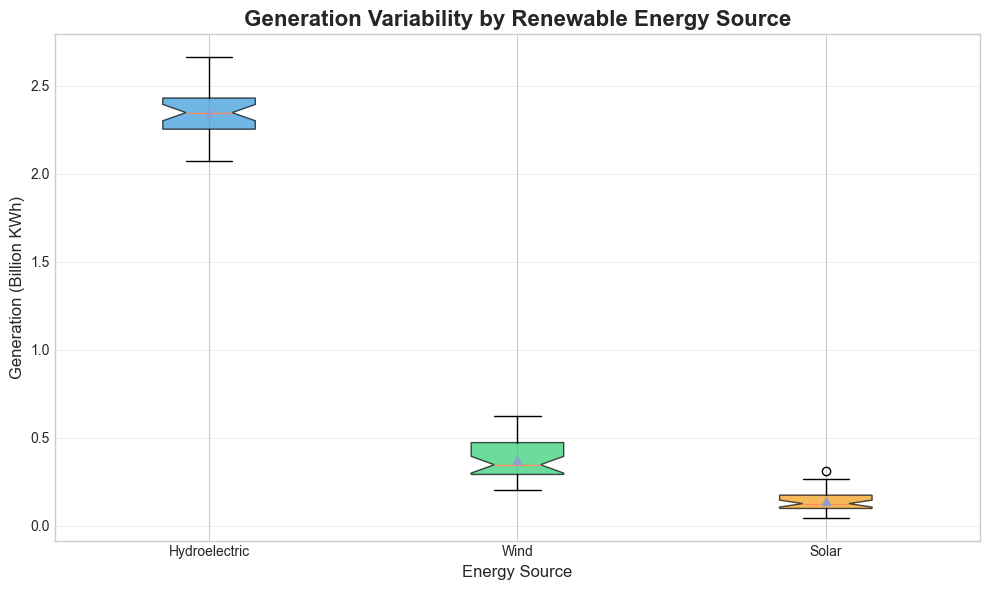


Figure saved

Variability Analysis:
Coefficient of Variation (CV = std/mean):
Hydroelectric: 0.064
Wind: 0.321
Solar: 0.450

Standard Deviation (Billion KWh):
Hydroelectric    0.149786
Wind             0.120472
Solar            0.064017
dtype: float64


In [18]:
print("="*60)
print("FIGURE 12: GENERATION VARIABILITY BY SOURCE")
print("="*60)

# Prepare data for box plot
gen_data = df_gen[['Hydroelectric', 'Wind', 'Solar']].copy() / 1e9
gen_data.columns = ['Hydroelectric', 'Wind', 'Solar']

# Create box plot
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot([gen_data['Hydroelectric'], 
                         gen_data['Wind'], 
                         gen_data['Solar']],
                        labels=['Hydroelectric', 'Wind', 'Solar'],
                        patch_artist=True,
                        notch=True,
                        showmeans=True)

# Color the boxes
colors = ['#3498db', '#2ecc71', '#f39c12']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Generation Variability by Renewable Energy Source', fontsize=16, fontweight='bold')
plt.ylabel('Generation (Billion KWh)', fontsize=12)
plt.xlabel('Energy Source', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Save figure
plt.savefig('../results/figures/fig12_generation_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved")

# Calculate coefficient of variation (CV)
print("\nVariability Analysis:")
print("Coefficient of Variation (CV = std/mean):")
for col in ['Hydroelectric', 'Wind', 'Solar']:
    cv = gen_data[col].std() / gen_data[col].mean()
    print(f"{col}: {cv:.3f}")

print("\nStandard Deviation (Billion KWh):")
print(gen_data.std())